## Import Libraries

In [9]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Load Cleaned Data

In [2]:
# Load data
df = pd.read_csv("../data/bank_cleaned.csv")
data = df.copy()
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False


## Separate Features and Target

In [3]:
# Features
X = data.drop(columns=['deposit'])

# Target
y = data['deposit']

## Initialize a Model for RFE

In [4]:
# Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')

## Apply RFE

In [5]:
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
selected_features

Index(['housing', 'duration', 'job_student', 'month_dec', 'month_jul',
       'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success'],
      dtype='object')

## Ranking of All Features

In [6]:
# Ranking: 1 = selected, higher = less important
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')
feature_ranking

,Feature,Ranking
37,poutcome_success,1
26,month_dec,1
31,month_mar,1
32,month_may,1
17,job_student,1
6,duration,1
29,month_jul,1
35,month_sep,1
3,housing,1
34,month_oct,1


## Visualize Feature Importance

/var/folders/f3/2h5sb1nn649d3hmt5qj1f_vm0000gn/T/ipykernel_11522/3282298766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ranking', y='Feature', data=feature_ranking, palette='viridis')


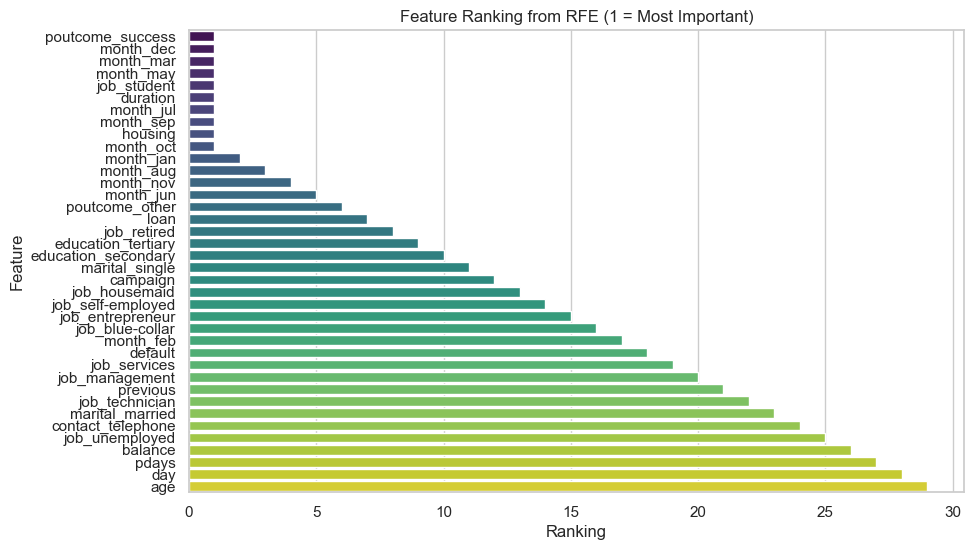

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='Ranking', y='Feature', data=feature_ranking, palette='viridis')
plt.title("Feature Ranking from RFE (1 = Most Important)")
plt.xlabel("Ranking")
plt.ylabel("Feature")
plt.show()

## Reduce Dataset to Selected Features

In [8]:
X_selected = X[selected_features]
X_selected.head()

,housing,duration,job_student,month_dec,month_jul,month_mar,month_may,month_oct,month_sep,poutcome_success
0,1,1.930226,False,False,False,False,True,False,False,False
1,0,3.154612,False,False,False,False,True,False,False,False
2,1,2.929901,False,False,False,False,True,False,False,False
3,1,0.596366,False,False,False,False,True,False,False,False
4,0,0.867171,False,False,False,False,True,False,False,False


## Compare Model Performance

In [10]:
# Model with all features
scores_all = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Accuracy with all features: {scores_all.mean():.3f}")

# Model with selected features
scores_rfe = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
print(f"Accuracy with RFE-selected features: {scores_rfe.mean():.3f}")

Accuracy with all features: 0.783
Accuracy with RFE-selected features: 0.793
